In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data        # Features: sepal length, sepal width, petal length, petal width
y = iris.target      # Target: Species (0: setosa, 1: versicolor, 2: virginica)

In [3]:
# Create a DataFrame for better EDA
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
# Display the first few rows and summary statistics
print("First 5 rows of the Iris dataset:")
df.head()

First 5 rows of the Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
print("Summary statistics:")
df.describe()

Summary statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print("Species distribution:")
df['species'].value_counts()

Species distribution:


,count
species,
setosa,50
versicolor,50
virginica,50


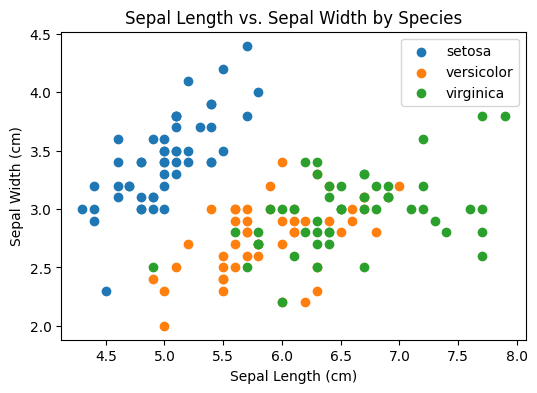

In [7]:
# Exploratory Data Analysis: Scatter plot for two features (Sepal Length vs. Sepal Width)
plt.figure(figsize=(6,4))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width by Species')
plt.legend()
plt.show()

In [8]:
# Split the dataset into training and testing sets (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [9]:
# Function to train and evaluate an SVM model with a given kernel
def train_evaluate_svm(kernel, **kwargs):
    print(f"\nTraining SVM with kernel: {kernel}")
    model = SVC(kernel=kernel, **kwargs, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Display evaluation metrics
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    return acc, cm

In [10]:
# Train and evaluate SVM models with different kernels
acc_linear, cm_linear = train_evaluate_svm('linear')
acc_poly, cm_poly = train_evaluate_svm('poly', degree=3)
acc_rbf, cm_rbf = train_evaluate_svm('rbf')



Training SVM with kernel: linear
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]

Training SVM with kernel: poly
Accuracy: 0.9555555555555556
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[15  0  0

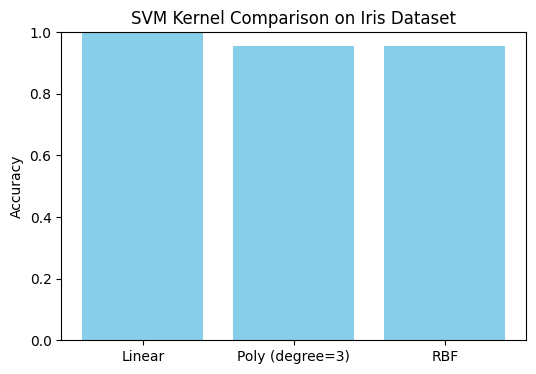

In [11]:
# Visualize and compare the accuracies of different SVM kernels
kernels = ['Linear', 'Poly (degree=3)', 'RBF']
accuracies = [acc_linear, acc_poly, acc_rbf]

plt.figure(figsize=(6,4))
plt.bar(kernels, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('SVM Kernel Comparison on Iris Dataset')
plt.show()

In [12]:
# Function to plot a confusion matrix for visual evaluation
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(4,3))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

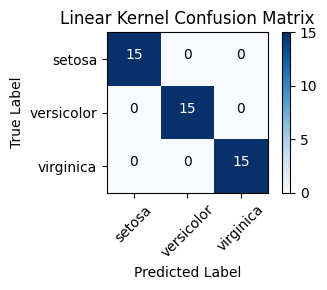

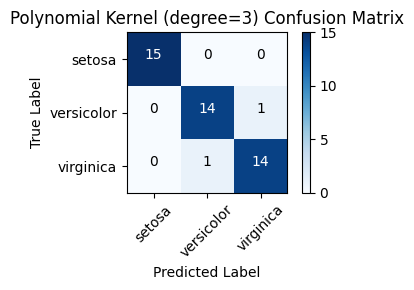

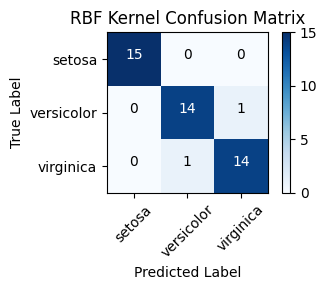

In [13]:
# Plot confusion matrices for each kernel
plot_confusion_matrix(cm_linear, title='Linear Kernel Confusion Matrix')
plot_confusion_matrix(cm_poly, title='Polynomial Kernel (degree=3) Confusion Matrix')
plot_confusion_matrix(cm_rbf, title='RBF Kernel Confusion Matrix')
plt.show()